# Importing Module and define directories

In [187]:
project_dir = '../../'
data_dir = project_dir + 'data/'

import sys
sys.path.append(project_dir + 'NN/')

import numpy as np
import importlib
import time
import matplotlib.pyplot as plt
import MLP
import layer
importlib.reload(MLP)
importlib.reload(layer)
from MLP import MLP
from utils.preprocessing import split,Normalize

In [188]:
def plot_results(network, input_data, val_data, labels, val_labels):
    train_pred = network.predict(input_data)
    val_pred = network.predict(val_data)
    x = np.arange(len(network.train_MEE))

    fig = plt.figure(figsize=(13,4))

    fig.add_subplot(131)
    plt.plot(x,network.train_MEE)
    plt.plot(x,network.val_MEE,label="test")
    plt.title("Learning curve")
    plt.xlabel("Epochs")
    plt.ylabel("Squared error")
    plt.yscale("log")
    plt.legend()

    fig.add_subplot(132)
    plt.title('Residual for training data')
    plt.plot(np.arange(len(labels)),labels[:,0]-train_pred[:,0],".",label="residual0")
    plt.plot(np.arange(len(labels)),labels[:,1]-train_pred[:,1],".",label="residual1")
    plt.legend()

    fig.add_subplot(133)
    plt.title('Residual for validation data')
    plt.plot(np.arange(len(val_labels)),val_labels[:,0]-val_pred[:,0],".",label="residual0")
    plt.plot(np.arange(len(val_labels)),val_labels[:,1]-val_pred[:,1],".",label="residual1")
    plt.legend()
    plt.tight_layout()
    plt.show()
    netw.predict(input_data)


# Train - Validation Split

In [189]:
raw_data=np.loadtxt("../../data/TR.csv",delimiter=",")[:,1:]
np.random.shuffle(raw_data)

In [190]:
input_data=raw_data[:,1:-2]
input_labels=raw_data[:,-2:]

frac_test=0.15
data, test_set, labels, test_labels = split(input_data, input_labels, 
                                            kind="hold_out",frac_training=1-frac_test)

frac_training=0.8
training, validation, labels, val_labels=split(data, labels,kind="hold_out",
                                              frac_training=frac_training)

In [191]:
#xavier weight inizialization
def xavier(structure):
    start=np.zeros(len(structure))
    for idx,num in enumerate(structure):
        if idx==0:
            start[idx]=np.sqrt(6)/np.sqrt(structure[idx])
        else:
            start[idx]=np.sqrt(6)/np.sqrt(structure[idx-1]+structure[idx])
    return list(start)


# Define the MLP

In [192]:
structure=[10, 10,np.shape(labels)[1]]
act_func=[("sigmoid",1),("sigmoid",1), ("linear",1)]
start=xavier(structure)

netw = MLP(structure, func=act_func,
           starting_points=start)

In [193]:
start

[0.7745966692414833, 0.5477225575051661, 0.7071067811865475]

## Train the model

In [194]:
N_epoch = 2000
lamb=0
batch_size = -1 #-1 for batch gradient descent
alpha=0.2
nesterov=True
eta_function=1e-2
beta=0.1
netw.train(training, labels, validation, val_labels,
           epoch = N_epoch,
           batch_size=batch_size,
           eta =eta_function, lamb = lamb,alpha=alpha,
           nesterov=nesterov,RMSProp=True,beta=beta, 
           error_threshold = 0., patience = 1000)

Epoch 1525:  [train MEE = 1.1197]  [val MEE = 1.2707]                              
Elapsed time: 4.8038530349731445 s


# Plot results

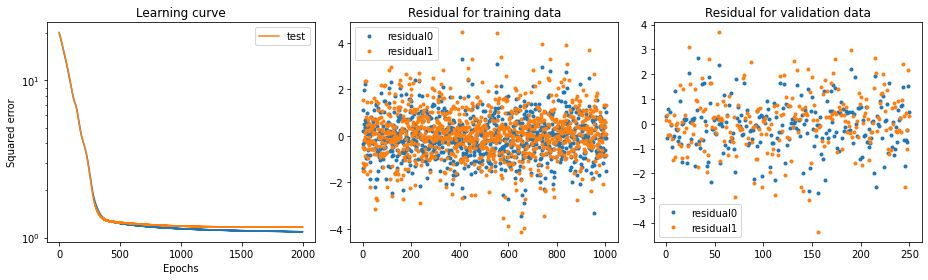

In [180]:
plot_results(netw, training, validation, labels, val_labels)

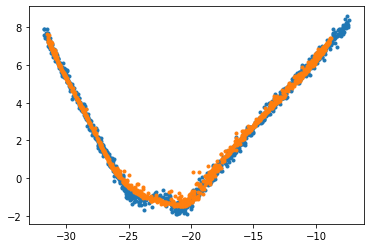

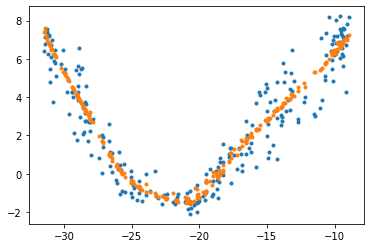

In [186]:
pred=netw.predict(training)
plt.plot(labels[:,1],labels[:,0],".")
plt.plot(pred[:,1],pred[:,0],".")
plt.show()

pred=netw.predict(validation)
plt.plot(pred[:,1],val_labels[:,0],".")
plt.plot(pred[:,1],pred[:,0],".")
plt.show()

In [29]:
#numpy correlation matrix for input_data features
corr_matrix=np.corrcoef(raw_data,rowvar=False)

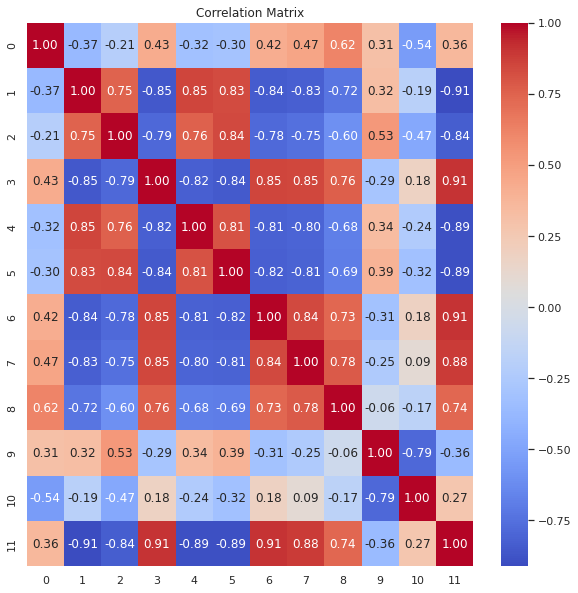

In [30]:
import seaborn as sns
#matplotlib heat map matrix for input_data features
plt.figure(figsize=(10,10))
plt.title("Correlation Matrix")
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="coolwarm")
plt.show()


In [30]:
from keras.layers import Input, Dense
from keras.models import Model
inp=Input(shape=(9,))
hidden=Dense(40,activation='sigmoid')(inp)
output=Dense(2,activation='linear')(hidden)

model=Model(inputs=inp,outputs=output)
model.compile(optimizer='adam',loss='mse')
model.fit(input_data,labels,epochs=1000,verbose=1)

Epoch 1/1000
32/32 [==============================] - 0s 4ms/step - loss: 222.1003
Epoch 2/1000
32/32 [==============================] - 0s 4ms/step - loss: 204.2513
Epoch 3/1000
32/32 [==============================] - 0s 3ms/step - loss: 187.6360
Epoch 4/1000
32/32 [==============================] - 0s 3ms/step - loss: 172.0900
Epoch 5/1000
32/32 [==============================] - 0s 3ms/step - loss: 157.7301
Epoch 6/1000
32/32 [==============================] - 0s 4ms/step - loss: 144.1149
Epoch 7/1000
32/32 [==============================] - 0s 4ms/step - loss: 131.2701
Epoch 8/1000
32/32 [==============================] - 0s 3ms/step - loss: 119.0856
Epoch 9/1000
32/32 [==============================] - 0s 5ms/step - loss: 107.5117
Epoch 10/1000
32/32 [==============================] - 0s 5ms/step - loss: 96.7015
Epoch 11/1000
32/32 [==============================] - 0s 4ms/step - loss: 86.6464
Epoch 12/1000
32/32 [==============================] - 0s 3ms/step - loss: 77.3482
Epoc

In [37]:
model.fit(input_data,labels,epochs=1000,verbose=1)

Epoch 1/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.7852
Epoch 2/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.7824
Epoch 3/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.7810
Epoch 4/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.7834
Epoch 5/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.7815
Epoch 6/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.7828
Epoch 7/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.7832
Epoch 8/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.7787
Epoch 9/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.7822
Epoch 10/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.7812
Epoch 11/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.7791
Epoch 12/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.7798
Epoch 13/1000
32/32 [====

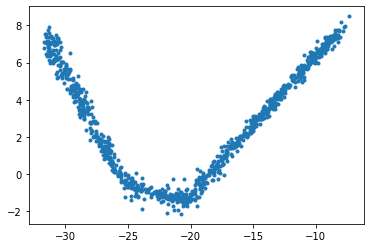

In [38]:
pred=model.predict(val_data)
tr=model.predict(input_data)
#plt.plot(labels[:,1],labels[:,0],".")
plt.plot(tr[:,1],tr[:,0],".")
#plt.plot(pred[:,1],pred[:,0],".")